In [2]:
import pandas as pd
from pprint import pprint
from matplotlib import pyplot as plt
import numpy as np

In [3]:
df = pd.read_pickle('./blocks_mined_while_status_ico__block_data_pickle.p')

In [4]:
trans = pd.read_pickle('./status_ico_transactions.p')

In [5]:
pprint(df)

0       {'blockNumber': '3903901', 'timeStamp': '14979...
1       {'blockNumber': '3903902', 'timeStamp': '14979...
2       {'blockNumber': '3903903', 'timeStamp': '14979...
3       {'blockNumber': '3903904', 'timeStamp': '14979...
4       {'blockNumber': '3903905', 'timeStamp': '14979...
5       {'blockNumber': '3903906', 'timeStamp': '14979...
6       {'blockNumber': '3903907', 'timeStamp': '14979...
7       {'blockNumber': '3903908', 'timeStamp': '14979...
8       {'blockNumber': '3903909', 'timeStamp': '14979...
9       {'blockNumber': '3903910', 'timeStamp': '14979...
10      {'blockNumber': '3903911', 'timeStamp': '14979...
11      {'blockNumber': '3903912', 'timeStamp': '14979...
12      {'blockNumber': '3903913', 'timeStamp': '14979...
13      {'blockNumber': '3903914', 'timeStamp': '14979...
14      {'blockNumber': '3903915', 'timeStamp': '14979...
15      {'blockNumber': '3903916', 'timeStamp': '14979...
16      {'blockNumber': '3903917', 'timeStamp': '14979...
17      {'bloc

In [6]:
miners = {}
blocks = {}
for i in range(len(df)):
    blocks[df[i]['blockNumber']] = {'miner':df[i]['blockMiner'],'transCount':0,'errorCount':0,'trueCount':0}
    miner = df[i]['blockMiner']
    if miner in miners:
        miners[miner]['blockCount'] += 1
        miners[miner]['blocks'].append(df[i]['blockNumber'])
    else:
        miners[miner] = {}
        miners[miner]['blockCount'] = 1
        miners[miner]['errorCount'] = 0
        miners[miner]['blocks'] = [df[i]['blockNumber']]

In [7]:
for bnum in miners['0x61c808d82a3ac53231750dadc13c777b59310bd9']['blocks']:
    if blocks[bnum]['transCount'] > 0:
        print(bnum,blocks[bnum]['transCount'],blocks[bnum]['errorCount'])

In [13]:
print(trans.keys())

Index(['blockHash', 'blockNumber', 'confirmations', 'contractAddress',
       'cumulativeGasUsed', 'errCode', 'from', 'gas', 'gasPrice', 'gasUsed',
       'hash', 'input', 'isError', 'nonce', 'timeStamp', 'to', 'traceId',
       'transactionIndex', 'txreceipt_status', 'type', 'value'],
      dtype='object')


In [8]:
notIn = []
p2pool = []
for i in range(len(trans)):
    bnum = str(trans['blockNumber'][i])
#     if (trans['blockNumber'] in )
    if bnum in blocks:
        miner = blocks[bnum]['miner']
        blocks[bnum]['transCount'] += 1
        if trans['isError'][i] == '1':
            miners[miner]['errorCount'] += 1
            blocks[bnum]['errorCount'] += 1
        else:
            blocks[bnum]['trueCount'] += 1
    else:
        if bnum not in notIn:
            notIn.append(bnum)

In [9]:
wOutTrans = []
wTrans = []

for bnum in blocks:
    if blocks[bnum]['transCount'] > 0:
        blocks[bnum]['ratio'] = 1.0*blocks[bnum]['errorCount']/blocks[bnum]['transCount']
        wTrans.append(bnum)
    else:
        wOutTrans.append(bnum)
        blocks[bnum]['ratio'] = 0

In [10]:
print(len(wOutTrans))
print(len(wTrans))

3503
626


In [11]:
x = []
y = []
z = []
t = []
for bnum in wTrans:
    x.append(bnum)
    y.append(blocks[bnum]['ratio'])
    z.append(blocks[bnum]['transCount'])
    t.append(blocks[bnum]['miner']=='0x61c808d82a3ac53231750dadc13c777b59310bd9')

In [12]:
print(blocks['3903910'])

{'miner': '0xb2930b35844a230f00e51431acae96fe543a0347', 'transCount': 35, 'errorCount': 33, 'trueCount': 2, 'ratio': 0.9428571428571428}


In [13]:
minersInd = []
for m in miners:
    minersInd.append(m)
    miners[m]['ind'] = len(minersInd) - 1

In [14]:
errCounts = []
blockCounts = []
for i in range(len(minersInd)):
    errCounts.append(miners[minersInd[i]]['errorCount'])
    blockCounts.append(miners[minersInd[i]]['blockCount'])

In [15]:
z = np.array(z)

In [16]:
print((z<3).sum())
print(z.shape)

67
(626,)


In [23]:
print(len(blocks))

4129


In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(311)
# ax.bar(blocks.keys(),range(len(blocks.keys())))

<BarContainer object of 4129 artists>

<BarContainer object of 626 artists>

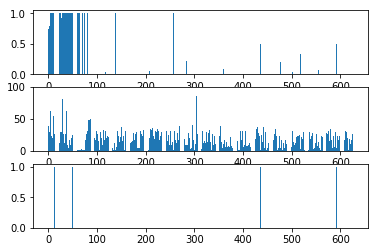

In [17]:
fig = plt.figure()
ax = fig.add_subplot(311)

ax.bar(range(len(x)),y)

ax2 = fig.add_subplot(312)
ax2.bar(range(len(x)),z)

ax3 = fig.add_subplot(313)
ax3.bar(range(len(x)),t)

In [47]:
pprint(miners)

{'0x1e9939daaad6924ad004c2560e90804164900341': {'blockCount': 526,
                                                'errorCount': 488,
                                                'ind': 2},
 '0x215c86bc952b0d98c4b2313a0a9ae56fa33c7f5d': {'blockCount': 6,
                                                'errorCount': 48,
                                                'ind': 19},
 '0x2a65aca4d5fc5b5c859090a6c34d164135398226': {'blockCount': 278,
                                                'errorCount': 4,
                                                'ind': 18},
 '0x3f4e874d4218ce28709524e05bcbf946b7d8a1b8': {'blockCount': 1,
                                                'errorCount': 0,
                                                'ind': 3},
 '0x49deb42acbbce35aa74f6df0be77162463658081': {'blockCount': 10,
                                                'errorCount': 0,
                                                'ind': 8},
 '0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01'